# Evaluación Final

Saulo César Beltrán Romero A0829482

Para comenzar importan las librerías por utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

Posteriormente se llama a la base de datos con la cual estaremos trabajando:

In [2]:
df = pd.read_csv('datasets/cwurData.csv')

# Acomodo y Limpieza

Ahora se realizará una limpieza para seleccionar solamente los datos deseados.

Dentro de esta limpieza se eliminarán las columnas, ‘alumni_employment’ y ‘broad_impact’, pues se consideró que son de baja importancia para la base de datos.


- Pregunta de investigación

Dentro del año 2015, ¿Cuáles son las 6 escuelas con un mejor ranking mundial? 


Para dar respuesta a esta pregunta, primeramente, se eliminaron las observaciones con valores de la columna ‘year’ menores al 2015, permitiendo así, un análisis sobre el año mas cercano dentro de la base de datos.
De igual manera, para lograr contestar la pregunta de las 6 escuelas con un mejor ranking, se eliminaron las observaciones que tuvieran un valor menor que 6 en la columna ‘world_rank’.

In [3]:
df.tail(2)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [4]:
#Eliminación de la columna de ‘broad_impact’ y 'alumni_employment’ 
df.drop(['broad_impact'], axis=1, inplace=True)
df.drop(['alumni_employment'], axis=1, inplace=True)

#Eliminación de las observaciones que no sean del 2015 y que se encuentren fuera del rank #6
df1 = df[(df['year']>= 2015) & (df['world_rank']<= 6)]
df1.tail(2)

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score,year
1204,5,University of Oxford,United Kingdom,2,7,10,7,12,7,15,96.46,2015
1205,6,Columbia University,USA,4,13,9,13,13,11,4,96.14,2015


Dentro de esta tabla, se puede observar que, a diferencia de la tabla de arriba, ya no existen valores menores de 45 dentro de la columna ‘score’. De igual manera, se puede observar que la columna 'broad_impact' ya no existe.
- Pregunta de investigación

¿Cuál será el nuevo acomodo de la tabla?

Se pondrá como índice la columna ‘institution’, permitiendo tener una visión más clara sobre las observaciones según el año en el que fueron tomadas.

In [5]:
#Etiquetas de las columnas fueron transformadas a strings.
df1.columns = list(map(str, df1.columns))

In [6]:
#Hacer ‘institution’ el indice.
df1.set_index('institution', inplace=True)
df1.head(6)

,world_rank,country,national_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score,year
institution,,,,,,,,,,,
Harvard University,1,USA,1,1,1,1,1,1,3,100.00,2015
Stanford University,2,USA,2,9,4,5,3,3,10,98.66,2015
Massachusetts Institute of Technology,3,USA,3,3,2,15,2,2,1,97.54,2015
University of Cambridge,4,United Kingdom,1,2,5,11,6,12,48,96.81,2015
University of Oxford,5,United Kingdom,2,7,10,7,12,7,15,96.46,2015
Columbia University,6,USA,4,13,9,13,13,11,4,96.14,2015


# Graficas

A primera instancia se agruparon los datos siguiendo a ‘institution’, posteriormente fueron filtrados por los valores más altos a los más bajos de la columna ‘quality_of_education’. Preparándonos así, para graficar estos valores.

In [9]:
df_institution = df1.groupby('institution', 
                           axis=0).sum()
df_institution.sort_values(['quality_of_education'], 
                          ascending=False, 
                          axis=0, 
                          inplace=True
                         )
df_institution.head(6)

,world_rank,national_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score,year
institution,,,,,,,,,,
Columbia University,6,4,13,9,13,13,11,4,96.14,2015
Stanford University,2,2,9,4,5,3,3,10,98.66,2015
University of Oxford,5,2,7,10,7,12,7,15,96.46,2015
Massachusetts Institute of Technology,3,3,3,2,15,2,2,1,97.54,2015
University of Cambridge,4,1,2,5,11,6,12,48,96.81,2015
Harvard University,1,1,1,1,1,1,1,3,100.00,2015


- Pregunta de investigación

De las 6 escuelas con mejor ranking mundial, ¿Cuál es la que tiene un score mayor?

Para contestar esta pregunta, se dio uso a un gráfico de pay, o pie chart. Dentro de este se puede observar que escuela dentro de las 6 seleccionadas tiene un mejor porcentaje de ‘score’, permitiéndonos conocer de manera visual la respuesta a la pregunta.

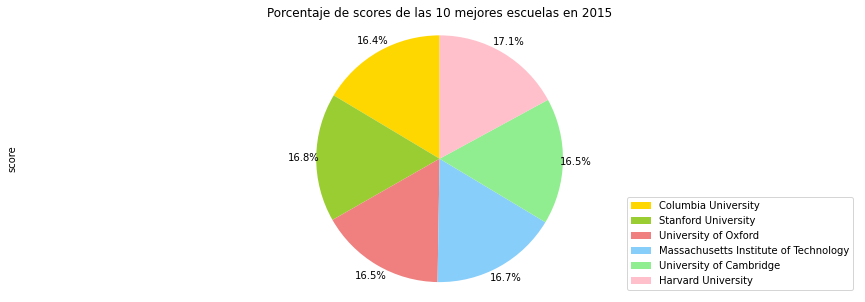

In [12]:
# autopct create %, start angle represent starting point
colors_list = ['gold', 'yellowgreen', 'lightcoral',
               'lightskyblue', 'lightgreen', 'pink']

df_institution['score'].plot(kind ='pie',
                            figsize =(15,5),
                            autopct ='%1.1f%%', 
                            startangle = 90,     
                            shadow = False,
                            labels = None,
                            pctdistance = 1.1,
                            colors = colors_list,
                            )

plt.title('Porcentaje de scores de las 10 mejores escuelas en 2015')
plt.axis('equal') 
plt.legend(labels = df_institution.index, loc='lower right') 

plt.show()